## **KNN Classification**

### *   **Badal Parmar**

# **Importing Required Libraries and Statements**

In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

# **Loading and Preparing Data**

In [ ]:
def scatter_plot(X, y, X_trn, y_trn, X_test, y_test, k, feature_idxs, knn, h=0.05):
    classes = list(set(y))
    cmap_light = ListedColormap(['#FFFAAA', '#AFFFAA', '#AFAAFF'])
    colours = ['red', 'green', 'blue']
    pad = 0.5
    x_min, x_max = X[:, feature_idxs[0]].min() - pad, X[:, feature_idxs[0]].max() + pad
    y_min, y_max = X[:, feature_idxs[1]].min() - pad, X[:, feature_idxs[1]].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    for i in classes:
        idx = np.where(y_trn == classes[i])
        plt.scatter(X_trn[idx, 0],
                    X_trn[idx, 1],
                    c=colours[i],
                    label=legend[i],
                    marker='o', s=20)
    for i in classes:
        idx = np.where(y_test == classes[i])
        plt.scatter(X_test[idx, 0],
                    X_test[idx, 1],
                    c=colours[i],  # label=legend[i],
                    marker='x', s=20)
    plt.legend()
    plt.xlabel(xlbl, fontsize=16)
    plt.ylabel(ylbl, fontsize=16)
    plt.title("kNN classification (k = {}) - train (o), test (x)"
              .format(k), fontsize=16)
    plt.show()

# **Training, Testing and Split of Dataset**

In [ ]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target

# For illustration purposes we will only be using the two features in the dataset
feature_idxs = [1, 3] 

feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
xlbl, ylbl = feature_names[feature_idxs[0]], feature_names[feature_idxs[1]] 
# We will also split the dataset into training and testing so we can evaluate the kNN classifier
X_trn_, X_test_, y_trn, y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.333, 
                                                 random_state=0,
                                                 stratify=y)
X_trn, X_test = X_trn_[:, feature_idxs], X_test_[:, feature_idxs]

print("X_trn.shape = {}, X_test.shape = {}".format(X_trn.shape, X_test.shape))
print("Features: {}, {}".format(feature_names[feature_idxs[0]], feature_names[feature_idxs[1]]))

X_trn.shape = (100, 2), X_test.shape = (50, 2)
Features: Sepal Width, Petal Width


# **Plotting Graph for Iris Dataset**

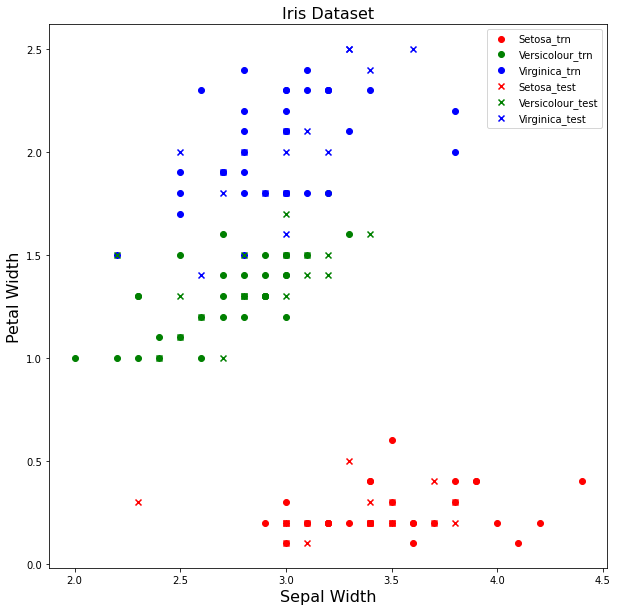

In [ ]:
colours = ['red', 'green', 'blue']
legend = ['Setosa', 'Versicolour', 'Virginica']
classes = list(set(y))
f = plt.figure(figsize=(10, 10))
for i in classes:
    idx = np.where(y_trn == classes[i])
    plt.scatter(X_trn[idx, 0], 
                X_trn[idx, 1], 
                c=colours[i], 
                label=legend[i] + '_trn')

for i in classes:
    idx = np.where(y_test == classes[i])
    plt.scatter(X_test[idx, 0], 
                X_test[idx, 1], 
                c=colours[i], 
                label=legend[i] + '_test',
                marker='x')
    
    
plt.legend()
plt.title('Iris Dataset', fontsize=16)
plt.xlabel(xlbl, fontsize=16)
plt.ylabel(ylbl, fontsize=16)
plt.show()

# **KNN Code for Claassification and Accuracy**

In [ ]:
import numpy as np
from collections import Counter


def euc_dist(a, b):
    return np.linalg.norm(a - b, ord=2)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


def norm_data(X):
    mean, std = X.mean(axis=0), X.std(axis=0)
    return (X - mean) / std, (mean, std)


def argsort(a):
    return np.array(a).argsort()


class kNearestNeighbor():
    def __init__(self, k=3, dist_metric='euclidean', norm=True):
        self.k = k
        self.isFit = False  # model fitting done?
        self.norm = norm
        self._set_dist_func(dist_metric)

    def fit(self, X_train, y_train, v=False):
        # check data
        if self.norm:
            X_train, (trn_mean, trn_std) = norm_data(X_train)
            self.trn_mean = trn_mean
            self.trn_std = trn_std
        self.X_train = X_train
        self.y_train = y_train

        y_train_pred, y_train_pred_proba = [], []
        for i, x_i in enumerate(X_train):
            distances = []
            for j, x_j in enumerate(X_train):
                if i == j:
                    dist_ij = 0
                else:
                    dist_ij = self.dist_func(x_i, x_j)

                distances.append(dist_ij)
            pred_i = self.estimate_point(distances, y_train)
            y_train_pred_i, y_train_pred_proba_i = pred_i
            y_train_pred.append(y_train_pred_i)
            y_train_pred_proba.append(y_train_pred_proba_i)

        if v:
            trn_acc = accuracy(y_train, y_train_pred)
            print('training accuracy: {}'.format(trn_acc))
        self.isFit = True

    def estimate_point(self, distances, y):
        sort_idx = argsort(distances)
        y_closest = y[sort_idx][:self.k]
        most_common = Counter(y_closest).most_common(1)[0]
        y_pred_i = most_common[0]
        y_pred_proba_i = most_common[1] / len(y_closest)
        return y_pred_i, y_pred_proba_i

    def norm_new(self, X_new):
        return (X_new - self.trn_mean) / self.trn_std

    def predict(self, X_new):
        if not (self.isFit):
            raise Exception('run knn.fit(x_trn, y_trn) before running knn.predict(x_new)')
        if self.norm:
            X_new = self.norm_new(X_new)

        y_new_pred, y_new_pred_proba = [], []
        for i, x_i in enumerate(X_new):
            distances = []
            for j, x_j in enumerate(self.X_train):
                dist_ij = self.dist_func(x_i, x_j)
                distances.append(dist_ij)

            pred_i = self.estimate_point(distances, self.y_train)
            y_pred_i, y_pred_proba_i = pred_i
            y_new_pred.append(y_pred_i)
            y_new_pred_proba.append(y_pred_proba_i)
        return y_new_pred

    def _set_dist_func(self, dist_metric):
        implemented_metrics = {'euclidean': euc_dist, }
        try:
            self.dist_func = implemented_metrics[dist_metric]
        except KeyError:
            raise Exception('{} is not an acceptable argument for dist_metric'.format(dist_metric))

# **Performing the Classification for K=3**

train accuracy: 0.96
test accuracy: 0.92


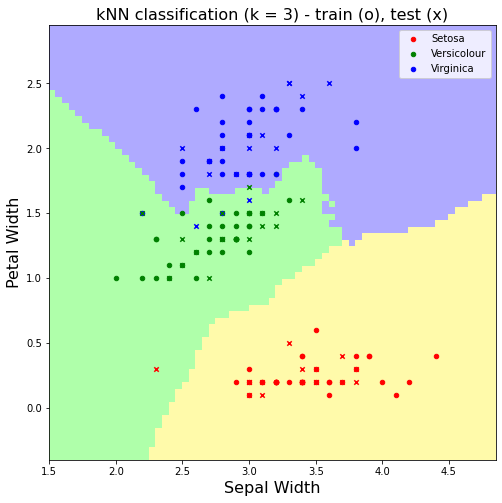

In [ ]:
k = 3
knn = kNearestNeighbor(k=k)
knn.fit(X_trn, y_trn, v=False)
y_trn_pred = knn.predict(X_trn)
trn_acc1 = accuracy(y_trn_pred, y_trn)
y_test_pred = knn.predict(X_test)
test_acc1 = accuracy(y_test_pred, y_test)
print('train accuracy: {}'.format(trn_acc1))
print('test accuracy: {}'.format(test_acc1))

scatter_plot(X, y, X_trn, y_trn, X_test, y_test, k, feature_idxs, knn)

# **Performing the Classification for K=5**

train accuracy: 0.97
test accuracy: 0.92


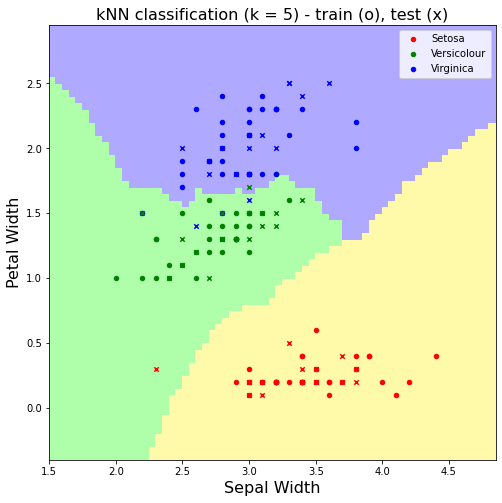

In [ ]:
k = 5
knn = kNearestNeighbor(k=k)
knn.fit(X_trn, y_trn, v=False)
y_trn_pred = knn.predict(X_trn)
trn_acc2 = accuracy(y_trn_pred, y_trn)
y_test_pred = knn.predict(X_test)
test_acc2 = accuracy(y_test_pred, y_test)
print('train accuracy: {}'.format(trn_acc2))
print('test accuracy: {}'.format(test_acc2))

scatter_plot(X, y, X_trn, y_trn, X_test, y_test, k, feature_idxs, knn)

# **Additional Code to find optimal value of K  for highest accuracy**

In [ ]:
k_list, trn_accs_list, test_accs_list = [], [], []
for k in range(1, 20):
    knn = kNearestNeighbor(k=k)
    knn.fit(X_trn, y_trn, v=False)
    y_trn_pred = knn.predict(X_trn)
    trn_acc = accuracy(y_trn_pred, y_trn)
    y_test_pred = knn.predict(X_test)
    test_acc = accuracy(y_test_pred, y_test)
    k_list.append(k)
    trn_accs_list.append(trn_acc)
    test_accs_list.append(test_acc)

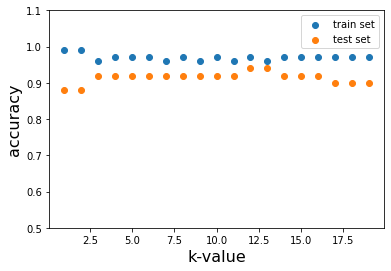

In [ ]:
plt.scatter(k_list, trn_accs_list, label='train set')
plt.scatter(k_list, test_accs_list, label='test set')
plt.xlabel('k-value', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.ylim([0.5, 1.1])
plt.legend()
plt.show()

optimal value for k: 12
train accuracy: 0.97
test accuracy: 0.94


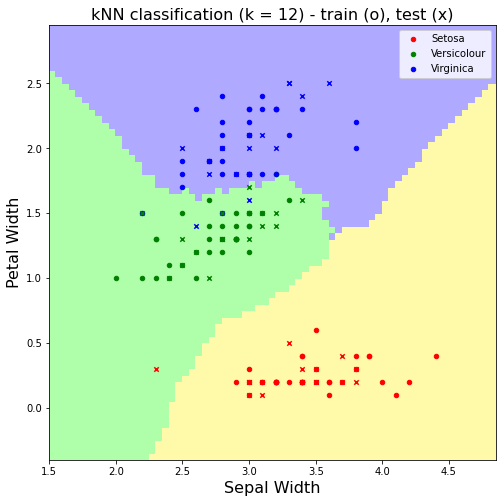

In [ ]:
k = np.argmax(test_accs_list) + 1
print('optimal value for k: {}'.format(k))
knn = kNearestNeighbor(k=k)
knn.fit(X_trn, y_trn, v=False)
y_trn_pred = knn.predict(X_trn)
trn_acc = accuracy(y_trn_pred, y_trn)
y_test_pred = knn.predict(X_test)
test_acc = accuracy(y_test_pred, y_test)
print('train accuracy: {}'.format(trn_acc))
print('test accuracy: {}'.format(test_acc))

scatter_plot(X, y, X_trn, y_trn, X_test, y_test, k, feature_idxs, knn)

# **Printing the obtained Accuracies in Ascending order**


### **=> KNN-3 < KNN-5 < Decision Tree**



In [ ]:
print('Training and Testing accuracy for k = 3')
print('train accuracy: {}'.format(trn_acc1))
print('test accuracy: {}'.format(test_acc1))

Training and Testing accuracy for k = 3
train accuracy: 0.96
test accuracy: 0.92


In [ ]:
print('Training and Testing accuracy for k = 5')
print('train accuracy: {}'.format(trn_acc2))
print('test accuracy: {}'.format(test_acc2))

Training and Testing accuracy for k = 5
train accuracy: 0.97
test accuracy: 0.92


In [ ]:
print ('The accuracy by using Decision tree Claasifier was 1.0')

The accuracy by using Decision tree Claasifier was 1.0


# **The Accuracy from KNN for K=3**
### > Training Accuracy: 0.96
### > Testing Accuracy: 0.92

# **The Accuracy from KNN for K=5**

### > Training Accuracy: 0.97
### > Testing Accuracy: 0.92

# **The Accuracy by using Decision tree Claasifier**

### > Training Accuracy: 1.0
### > Testing Accuracy: 1.0

